In [1]:
import matplotlib.pyplot as plt

import torch
import torch.distributions as dist

import zuko
from sklearn.datasets import make_moons

from tqdm import tqdm

In [2]:
n_samples = int(1e6)
n_visual  = int(1e4)

data = torch.from_numpy(make_moons(n_samples=n_samples, noise=0.1)[0]).float()

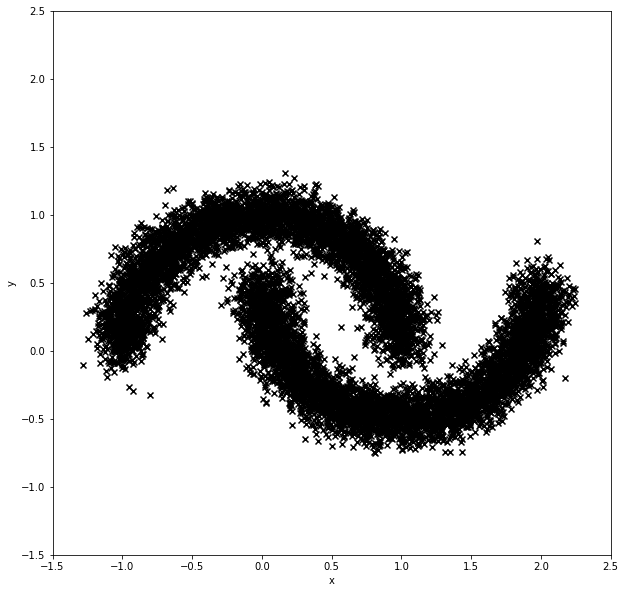

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data[:n_visual, 0], data[:n_visual, 1], marker='x', color='black')

ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-1.5, 2.5)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [4]:
flow_guide = zuko.flows.NSF(features=2, context=0, transforms=10, passes=2)

100%|██████████| 3125/3125 [02:27<00:00, 21.25it/s]


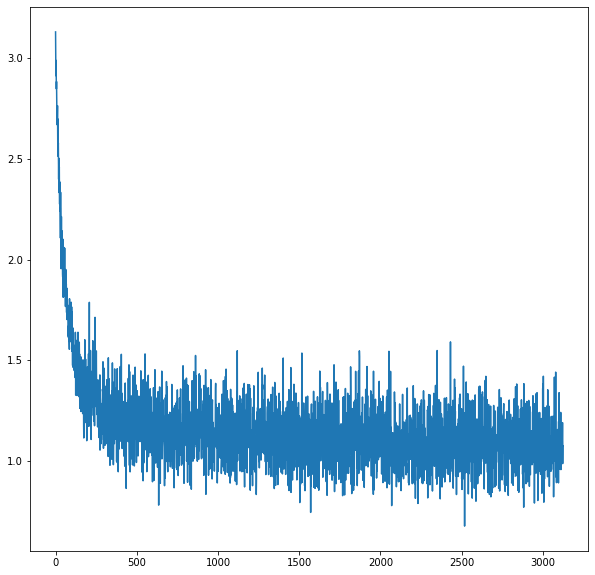

In [5]:
from torch.utils.data import DataLoader

dataloader = DataLoader(data[:int(1e5)], batch_size=32, shuffle=True)

# Train to maximize the log-likelihood
optimizer = torch.optim.AdamW(flow_guide.parameters(), lr=1e-4)
losses = []

for d in tqdm(dataloader):
    loss = -flow_guide().log_prob(d)
    loss = loss.mean()
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(losses)
plt.show()

In [6]:
post_samples = flow().sample((n_visual,))
print(post_samples.shape)

NameError: name 'flow' is not defined

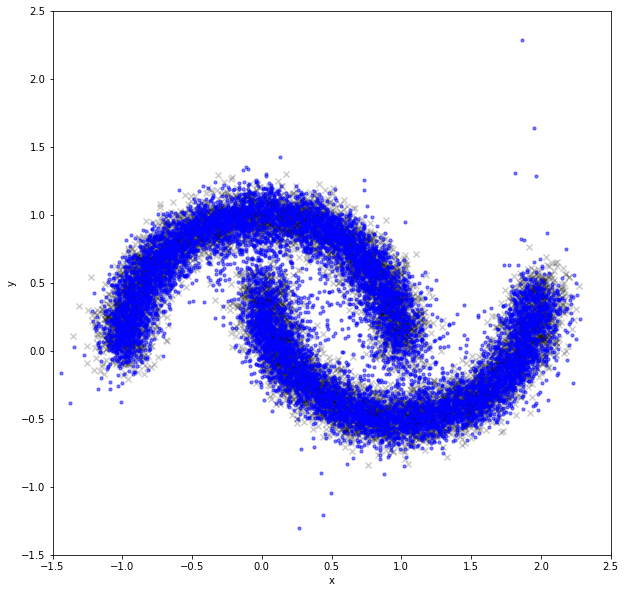

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data[:n_visual, 0], data[:n_visual, 1], marker='x', color='black', alpha=0.2)
ax.scatter(post_samples[:n_visual, 0], post_samples[:n_visual, 1], marker='o', color='blue', alpha=0.5, s=10)

ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-1.5, 2.5)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()